In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential,layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
aphids=glob.glob(r"C:/Users/hp/Desktop/edure/projects/Deep Learning/Capstone Project/Cotton Plant Disease Dataset/Cotton plant disease/Cotton plant disease/Aphids edited/*.jpg")
army_worm=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Cotton Plant Disease Dataset\Cotton plant disease\Cotton plant disease\Army worm edited\*.jpg")
bacterial_blight=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Cotton Plant Disease Dataset\Cotton plant disease\Cotton plant disease\Bacterial Blight edited\*.jpg")
healthy_leaf=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Cotton Plant Disease Dataset\Cotton plant disease\Cotton plant disease\Healthy leaf edited\*.jpg")
powdery_mildew=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Cotton Plant Disease Dataset\Cotton plant disease\Cotton plant disease\Powdery Mildew Edited\*.jpg")
target_spot=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Cotton Plant Disease Dataset\Cotton plant disease\Cotton plant disease\Target spot edited\*.jpg")

In [3]:
print(len(aphids))
print(len(army_worm))
print(len(bacterial_blight))
print(len(healthy_leaf))
print(len(powdery_mildew))
print(len(target_spot))

39
40
40
38
38
39


In [4]:

images = []
labels = []

for i in aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in army_worm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in bacterial_blight:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in healthy_leaf:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in powdery_mildew:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

for i in target_spot:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)


In [5]:
classes = {0: "aphids",1: "army_worm", 2: "bacterial_blight", 3: "healthy_leaf", 4: "powdery_mildew", 5: "target_spot"}

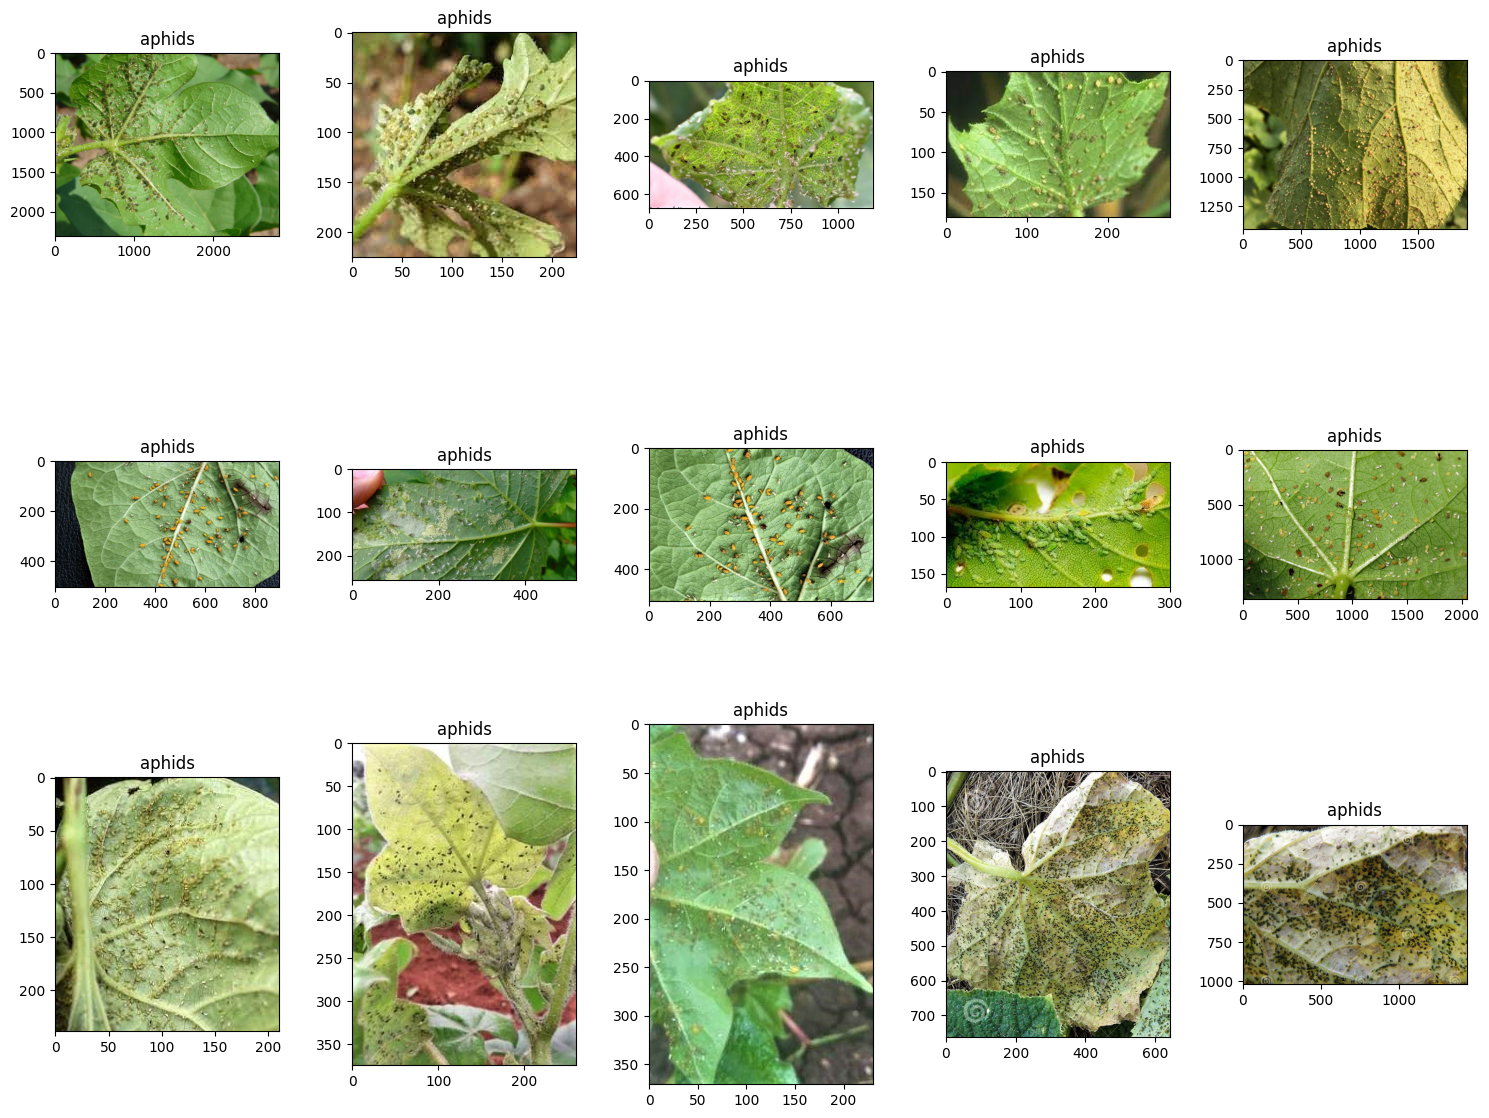

In [6]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i],cmap ='gray')
    plt.title(classes[labels[i]])

plt.tight_layout()

In [7]:

images, labels = shuffle(images, labels)

In [8]:

labels[:5]

[2, 2, 2, 5, 0]

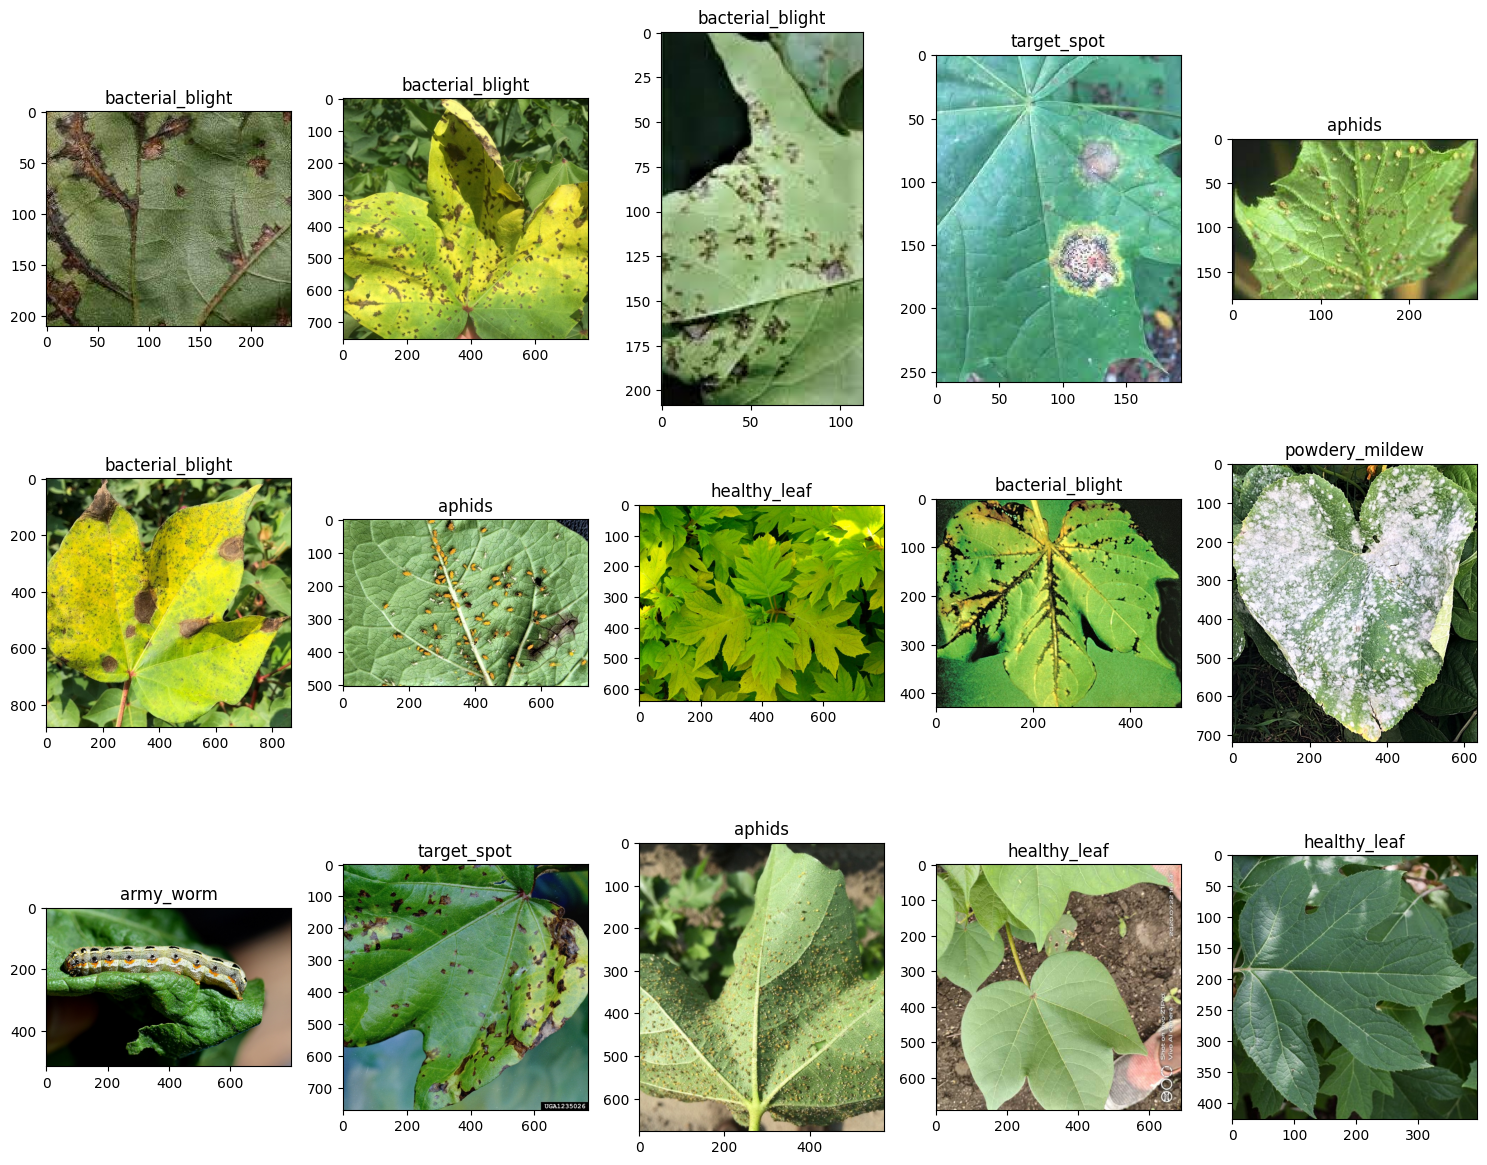

In [9]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i],cmap ='gray')
    plt.title(classes[labels[i]])

plt.tight_layout()

In [10]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

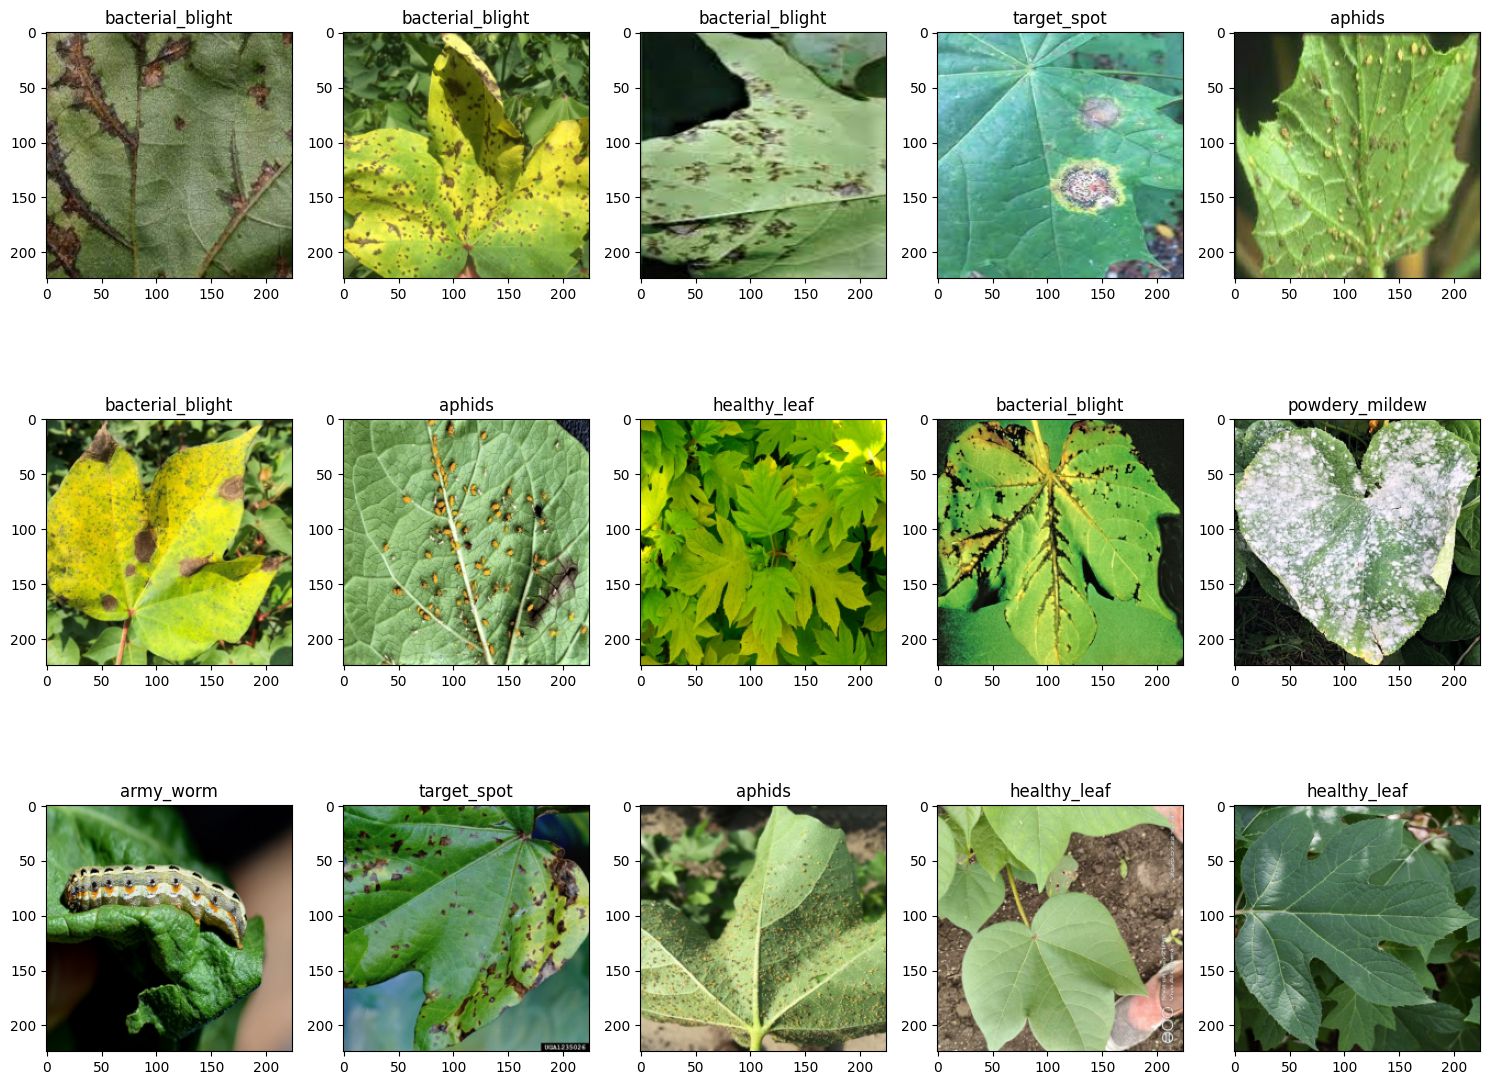

In [11]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X[i])
    plt.title(classes[labels[i]])

plt.tight_layout()

In [12]:
X = np.array(X)
y = np.array(labels)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)


MobileNetV2 Pre-trained Feature Extractor Model URL
"https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [14]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

 Load Pre-trained MobileNetV2 Feature Extractor Model
hub.load(feature_extractor_model)

In [17]:
!pip install tensorflow-hub


INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 1.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00


In [18]:

import tensorflow_hub as hub

In [19]:

### Define Number of Output Classes

num_of_classes = 6

In [20]:

#### Instantiate MobileNetV2 without Top Layer as Feature Extractor
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [21]:
model = Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Lambda(lambda x: pretrained_model_without_top_layer(x)),

    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.2047 - loss: 1.9094 - val_accuracy: 0.4444 - val_loss: 1.3723
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step - accuracy: 0.5169 - loss: 1.3312 - val_accuracy: 0.5556 - val_loss: 1.2514
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.7914 - loss: 0.9113 - val_accuracy: 0.7778 - val_loss: 0.9346
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.9163 - loss: 0.6329 - val_accuracy: 1.0000 - val_loss: 0.5339
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.9037 - loss: 0.4377 - val_accuracy: 1.0000 - val_loss: 0.4059
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.9532 - loss: 0.2779 - val_accuracy: 0.8889 - val_loss: 0.3543
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.9406 - loss: 0.2430 - val_accuracy: 0.8889 - val_loss: 0.3643
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - accuracy: 0.9965 - loss: 0.1569 - val_accuracy: 0.8889 - val_loss:

In [24]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 587ms/step


In [25]:
y_pred = [np.argmax(i) for i in y_pred]

In [26]:
accuracy_score(y_test,y_pred)

0.8169014084507042

<Axes: >

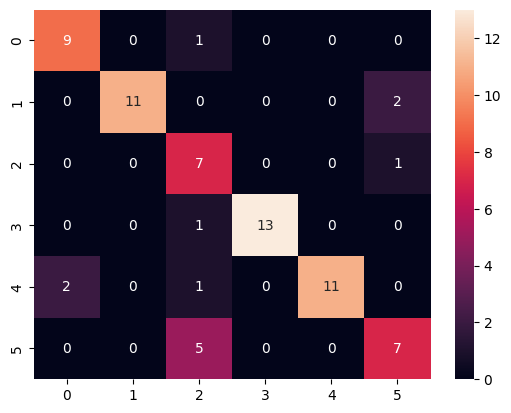

In [27]:

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.85      0.92        13
           2       0.47      0.88      0.61         8
           3       1.00      0.93      0.96        14
           4       1.00      0.79      0.88        14
           5       0.70      0.58      0.64        12

    accuracy                           0.82        71
   macro avg       0.83      0.82      0.81        71
weighted avg       0.86      0.82      0.83        71

